# Workshop 3: Data Pre-processing¶
COSC2671 Social Media and Network Analytics

Jeffrey Chan, RMIT University, 2023


The following function is a helper one, it does tokenisation removing stopwords and stemming.

In [93]:
import sys
import re
import json
import string
from collections import Counter
from spellchecker import SpellChecker
import nltk
# nltk.download('stopwords')
# nltk.download("wordnet")
import functools
import matplotlib.pyplot as plt


In [94]:
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}


In [95]:
def processText(text, tokenizer, lemmatizer, stopwords):
    """
    Perform tokenisation, normalisation (lower case and stemming) and stopword and twitter keyword removal.

    @param text: reddit submission or comment text
    @param tokenizer: tokeniser used.
    @param stemmer: stemmer used.
    @param stopwords: list of stopwords used

    @returns: a list of processed tokens
    """
    # remove urls
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)

    # covert all to lower case
    text = text.lower()
    # tokenise
    lTokens = tokenizer.tokenize(text)
    # strip whitespaces before and after
    lTokens = [token.strip() for token in lTokens]
    # stem (we use set to remove duplicates)
    lemmatizedTokens = set([lemmatizer.lemmatize(tok) for tok in lTokens])

    expand_abbreviations = [abbreviations[tok] if tok in abbreviations else tok for tok in lemmatizedTokens]
    spell = SpellChecker()
    spelled_words = [spell.correction(tok) for tok in expand_abbreviations]
    # remove stopwords, digits and make sure there is no None value in
    return [tok for tok in expand_abbreviations if tok and tok not in stopwords and not tok.isdigit()]

The following is the main part of the Notebook.  It setups, loads from the json file and calls processText().  Then it update the count of the terms.

In [99]:

# load json file
# note usually we would do some checks, but for clarify's sake we haven't implement that code here
fJsonName = 'nvidia_stock_data.json'

# number of most frequent terms to display
freqNum = 100

# tweet tokeniser to use
tweetTokeniser = nltk.tokenize.TweetTokenizer()
# use the punctuation symbols defined in string.punctuation
lPunct = list(string.punctuation)
# use stopwords from nltk and a few other twitter specific terms like 'rt' (retweet)
lStopwords = nltk.corpus.stopwords.words('english') + lPunct + ['via']
# we use the powerful lemmatizer to get original words
redditLemmatizer = nltk.stem.WordNetLemmatizer()

# our term frequency counter
termFreqCounter = Counter()



# open json file and process it tweet by tweet
with open(fJsonName, 'r') as f:
    dSubmissions = json.load(f)
    
    for submission in dSubmissions['submissions']:
        submissionsTitle = submission.get('title', '')
        # tokenise, filter stopwords and get convert to lower case
        lTokens = processText(text=submissionsTitle, tokenizer=tweetTokeniser, lemmatizer=redditLemmatizer, stopwords=lStopwords)
        # update count
        termFreqCounter.update(lTokens)
freq_terms = []
# print out most common terms
for term, count in termFreqCounter.most_common(freqNum):
    freq_terms.append(term)
    freq_terms.append(count)
    print(term + ': ' + str(count))

nvidia: 272
nvda: 195
 dollar : 138
ai: 127
’: 88
stock: 64
earnings: 49
chip: 48
year: 43
new: 42
jensen: 41
say: 40
share: 38
buy: 38
price: 37
market: 35
next: 33
ceo: 29
...: 29
huang: 27
target: 27
nvidia's: 27
today: 26
call: 25
company: 25
billion: 25
blackwell: 23
—: 22
ha: 22
gpus: 22
time: 20
apple: 19
go: 19
day: 19
analyst: 18
tech: 18
data: 18
going: 17
could: 17
month: 17
dip: 17
revenue: 17
gpu: 17
big: 16
gtc: 16
microsoft: 16
bought: 15
split: 15
amd: 15
point: 15
tsmc: 15
center: 15
holding: 14
wa: 14
first: 14
think: 14
report: 14
demand: 14
good: 14
one: 13
top: 13
sell: 13
buying: 13
week: 13
sale: 12
amazon: 12
tomorrow: 12
cap: 12
growth: 12
“: 12
model: 12
supercomputer: 12
🚀: 11
still: 11
like: 11
trillion: 11
million: 11
investor: 11
”: 11
…: 10
h100: 10
worth: 10
get: 10
right: 9
coming: 9
guy: 9
gain: 9
people: 9
raised: 9
high: 9
doe: 9
nasdaq: 9
ahead: 9
best: 9
hit: 8
make: 8
drop: 8
invest: 8
street: 8
monday: 8


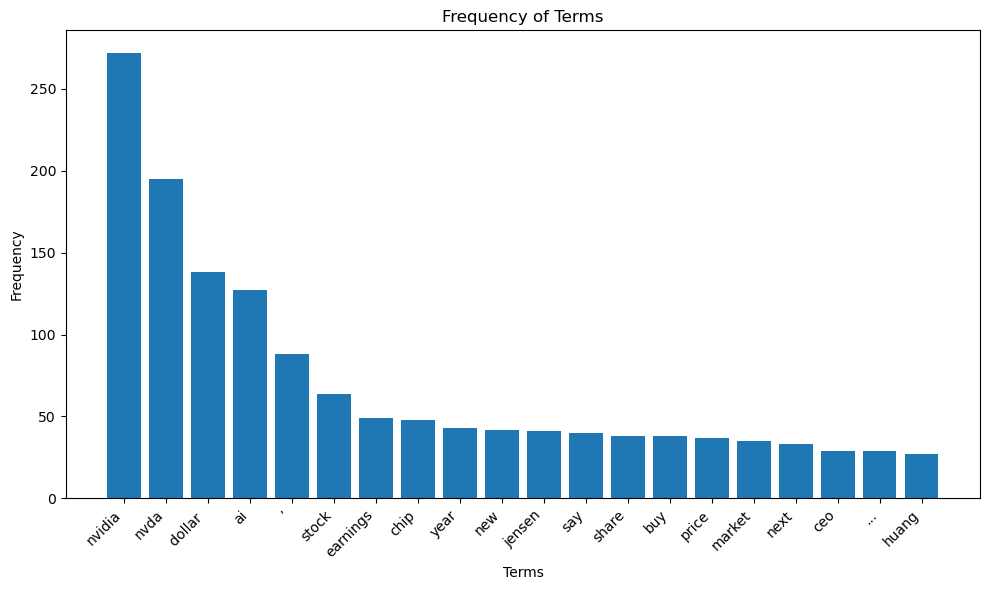

In [108]:
import matplotlib.pyplot as plt
labels = []
values = []

# Iterate through the list
for i in range(0, len(freq_terms), 2):
    labels.append(freq_terms[i])      # Add the string to labels list
    values.append(freq_terms[i+1])    # Add the number to values list
plt.figure(figsize=(10, 6))  # Adjust the figure size for better readability
plt.bar(labels[:20],values[:20])
# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Add title and labels
plt.title('Frequency of Terms')
plt.xlabel('Terms')
plt.ylabel('Frequency')

# Adjust layout to ensure everything fits
plt.tight_layout()

# Display the plot
plt.show()

In [120]:
import pyLDAvis # package to interpret the topics in a topic model
import pyLDAvis.gensim_models # python library for the interactive topic modeling visualization
import pickle # for html export
import pandas as pd # for data processing
import os # for setting working directory
import re # regular expression library
from wordcloud import WordCloud # for generating word clouds
import gensim # open-source library for unsupervised topic modeling, document indexing
from gensim.utils import simple_preprocess
import nltk # python tool kit for NLP
nltk.download('stopwords')
from nltk.corpus import stopwords # for removing stop words
import gensim.corpora as corpora # for mapping words to integers
import warnings
warnings.filterwarnings("ignore")

RuntimeError: Compiled extensions are unavailable. If you've installed from a package, ask the package maintainer to include compiled extensions. If you're building Gensim from source yourself, install Cython and a C compiler, and then run `python setup.py build_ext --inplace` to retry. 

In [122]:
!conda install -c conda-forge scipy



^C


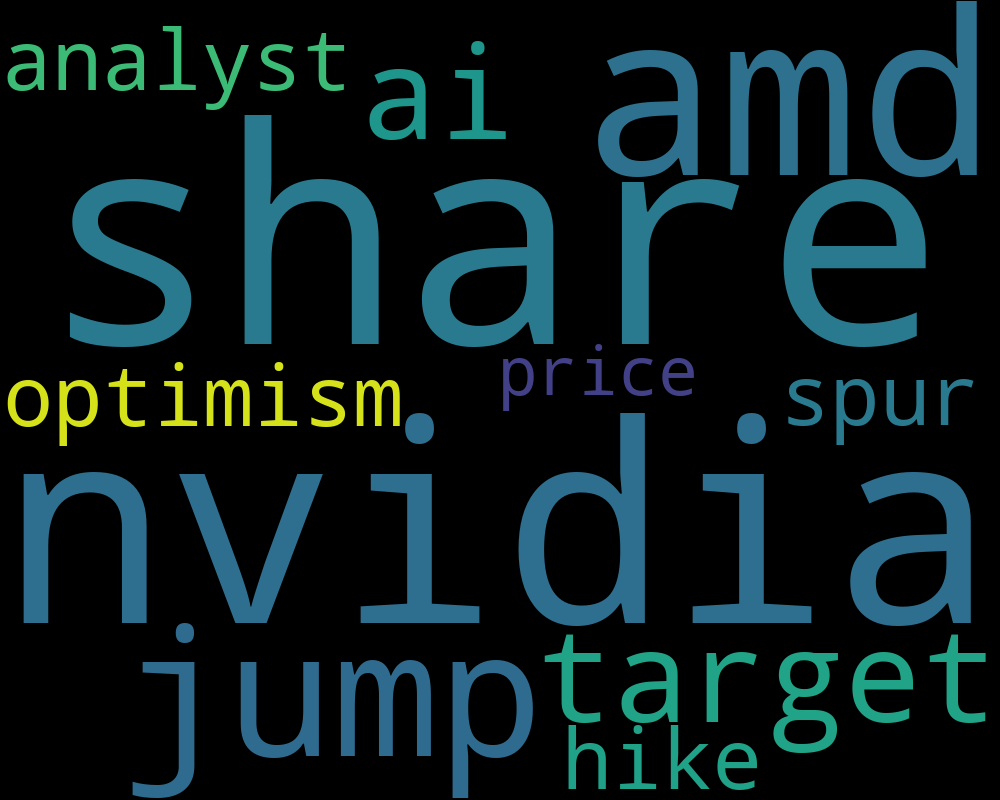

In [131]:
# Join the different processed titles together.
# long_string = ','.join(lTokens)
# Create a WordCloud object
lTokens = WordCloud(background_color="black", max_words=5000, contour_width=3, contour_color='steelblue',width=1000,height=800)

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [137]:
!pip install --upgrade numpy scipy smart_open
import gensim.corpora as corpora # for mapping words to integers

     ---------------------------------------- 0.0/60.9 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.9 kB 640.0 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/60.9 kB 650.2 kB/s eta 0:00:01
     -------------------------------------- 60.9/60.9 kB 538.9 kB/s eta 0:00:00
  Using cached scipy-1.14.0-cp312-cp312-win_amd64.whl.metadata (60 kB)
   ---------------------------------------- 0.0/16.3 MB ? eta -:--:--
    --------------------------------------- 0.4/16.3 MB 10.9 MB/s eta 0:00:02
   -- ------------------------------------- 0.9/16.3 MB 11.7 MB/s eta 0:00:02
   -- ------------------------------------- 1.1/16.3 MB 11.1 MB/s eta 0:00:02
   --- ------------------------------------ 1.3/16.3 MB 9.2 MB/s eta 0:00:02
   ---- ----------------------------------- 2.0/16.3 MB 8.9 MB/s eta 0:00:02
   ------ --------------------------------- 2.5/16.3 MB 9.3 MB/s eta 0:00:02
   ------ --------------------------------- 2.6/16.3 MB 8.3 MB/s eta 0:00:02
   --

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.0.1 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.0.1 which is incompatible.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.0 which is incompatible.
numba 0.59.1 requires numpy<1.27,>=1.22, but you have numpy 2.0.1 which is incompatible.
pywavelets 1.5.0 requires numpy<2.0,>=1.22.4, but you have numpy 2.0.1 which is incompatible.
streamlit 1.32.0 requires numpy<2,>=1.19.3, but you have numpy 2.0.1 which is incompatible.


RuntimeError: Compiled extensions are unavailable. If you've installed from a package, ask the package maintainer to include compiled extensions. If you're building Gensim from source yourself, install Cython and a C compiler, and then run `python setup.py build_ext --inplace` to retry. 

In [134]:
# Create Dictionary 
id2word = corpora.Dictionary(lTokens)

# Create Corpus
texts = lTokens

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Printing the corpus in a numeric form which implies the frequency of the word
print(corpus[:1][0][:30])

c:\Users\HP\anaconda3\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
c:\Users\HP\anaconda3\Lib\ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)
c:\Users\HP\anaconda3\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
c:\Users\HP\anaconda3\Lib\ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)


NameError: name 'corpora' is not defined

In [ ]:
#Showing the code
id2word

In [ ]:
from pprint import pprint
# number of topics
num_topics = 3

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]